### Traffic accident data EDA
### Phase 1

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('US_Accidents_June20.csv')

* <b>Why pick this data?</b> The dataset provides a comprehensive view of traffic accidents in the US. There are large number of observations and each accident record contains a wide range of attributes including spatiotemporal information, severity, weather conditions, and nearby points-of-interests. Exploratory data analysis on this large dataset could reveal the impact of various factors or combination of factors on accident occurence. 
* <b>Hunch about what this data will reveal?</b> One hypothesis is that traffic accidents occur less frequently between the hours of 12am-6am, and occur less frequently on Fridays, Saturdays and Sundays. 

* <b>Population represented by the data?</b> The data is organized at the state level, collected from 48 states in the contiguous US and Washington, DC. The data was continuously collected from February 2016 to June 2020. 
* <b>Total sample size?</b> The total sample size is ~3.5 million observations.

* <b>Data collection.</b> The dataset, available from Kaggle, was collected from two APIs that provide streaming traffic event data (Microsoft Bing Map Traffic and MapQuest Traffic). Data from these two APIs were in turn aggregated from a variety of sources, including the US Department of Transportation, state departments of transportation, law enforcement agencies, and other sources. 
* <b>Is this a random sample? Are sampling weights used?</b> This dataset is a record of traffic accidents and is not a random sample. No sampling weights were used.

In [3]:
print(f'The original dataframe has {df.shape[0]} rows and {df.shape[1]} columns')
df.head(10)

The original dataframe has 3513617 rows and 49 columns


ID    Source    TMC  Severity           Start_Time             End_Time  \
0   A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1   A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2   A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3   A-4  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4   A-5  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07   
5   A-6  MapQuest  201.0         3  2016-02-08 07:44:26  2016-02-08 08:14:26   
6   A-7  MapQuest  201.0         2  2016-02-08 07:59:35  2016-02-08 08:29:35   
7   A-8  MapQuest  201.0         3  2016-02-08 07:59:58  2016-02-08 08:29:58   
8   A-9  MapQuest  201.0         2  2016-02-08 08:00:40  2016-02-08 08:30:40   
9  A-10  MapQuest  201.0         3  2016-02-08 08:10:04  2016-02-08 08:40:04   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Roundabout Station   Stop  \
0  39.865147 -84.058723      NaN      NaN  ...       False   False  False   
1  39.928059 -82.831184      NaN      NaN  ...       False   False  False   
2  39.063148 -84.032608      NaN      NaN  ...       False   False  False   
3  39.747753 -84.205582      NaN      NaN  ...       False   False  False   
4  39.627781 -84.188354      NaN      NaN  ...       False   False  False   
5  40.100590 -82.925194      NaN      NaN  ...       False   False  False   
6  39.758274 -84.230507      NaN      NaN  ...       False   False  False   
7  39.770382 -84.194901      NaN      NaN  ...       False   False  False   
8  39.778061 -84.172005      NaN      NaN  ...       False   False  False   
9  40.100590 -82.925194      NaN      NaN  ...       False   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   
2           False           True        False          Night          Night   
3           False          False        False          Night            Day   
4           False           True        False            Day            Day   
5           False          False        False            Day            Day   
6           False          False        False            Day            Day   
7           False          False        False            Day            Day   
8           False          False        False            Day            Day   
9           False          False        False            Day            Day   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  
1             Night                   Day  
2               Day                   Day  
3               Day                   Day  
4               Day                   Day  
5               Day                   Day  
6               Day                   Day  
7               Day                   Day  
8               Day                   Day  
9               Day                   Day  

[10 rows x 49 columns]

In [4]:
df.tail(10)

ID Source  TMC  Severity           Start_Time  \
3513607  A-3513771   Bing  NaN         2  2019-08-23 17:42:27   
3513608  A-3513772   Bing  NaN         2  2019-08-23 17:40:12   
3513609  A-3513773   Bing  NaN         2  2019-08-23 17:40:12   
3513610  A-3513774   Bing  NaN         2  2019-08-23 17:43:56   
3513611  A-3513775   Bing  NaN         2  2019-08-23 18:30:23   
3513612  A-3513776   Bing  NaN         2  2019-08-23 18:03:25   
3513613  A-3513777   Bing  NaN         2  2019-08-23 19:11:30   
3513614  A-3513778   Bing  NaN         2  2019-08-23 19:00:21   
3513615  A-3513779   Bing  NaN         2  2019-08-23 19:00:21   
3513616  A-3513780   Bing  NaN         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng    End_Lat     End_Lng  \
3513607  2019-08-23 18:11:10  34.064460 -118.003880  34.065330 -117.997150   
3513608  2019-08-23 18:08:35  33.943599 -117.077880  33.943599 -117.077880   
3513609  2019-08-23 18:08:35  34.261030 -119.228000  34.262390 -119.230870   
3513610  2019-08-23 18:12:27  33.741700 -117.837090  33.739170 -117.830010   
3513611  2019-08-23 18:58:54  34.239104 -118.416176  34.239104 -118.416176   
3513612  2019-08-23 18:32:01  34.002480 -117.379360  33.998880 -117.370940   
3513613  2019-08-23 19:38:23  32.766960 -117.148060  32.765550 -117.153630   
3513614  2019-08-23 19:28:49  33.775450 -117.847790  33.777400 -117.857270   
3513615  2019-08-23 19:29:42  33.992460 -118.403020  33.983110 -118.395650   
3513616  2019-08-23 19:21:31  34.133930 -117.230920  34.137360 -117.239340   

         ...  Roundabout Station   Stop Traffic_Calming Traffic_Signal  \
3513607  ...       False   False  False           False          False   
3513608  ...       False   False  False           False          False   
3513609  ...       False   False  False           False          False   
3513610  ...       False   False  False           False          False   
3513611  ...       False   False  False           False          False   
3513612  ...       False   False  False           False          False   
3513613  ...       False   False  False           False          False   
3513614  ...       False   False  False           False          False   
3513615  ...       False   False  False           False          False   
3513616  ...       False   False  False           False          False   

        Turning_Loop Sunrise_Sunset Civil_Twilight Nautical_Twilight  \
3513607        False            Day            Day               Day   
3513608        False            Day            Day               Day   
3513609        False            Day            Day               Day   
3513610        False            Day            Day               Day   
3513611        False            Day            Day               Day   
3513612        False            Day            Day               Day   
3513613        False            Day            Day               Day   
3513614        False            Day            Day               Day   
3513615        False            Day            Day               Day   
3513616        False            Day            Day               Day   

        Astronomical_Twilight  
3513607                   Day  
3513608                   Day  
3513609                   Day  
3513610                   Day  
3513611                   Day  
3513612                   Day  
3513613                   Day  
3513614                   Day  
3513615                   Day  
3513616                   Day  

[10 rows x 49 columns]

In [5]:
# get a description of the data elements from a table on the source website
# get BeautifulSoup object from source website
url = 'https://smoosavi.org/datasets/us_accidents' 
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
# find table in BeautifulSoup object and get the table as a dataframe
table = soup.find("table") 
description_table = pd.read_html(str(table))[0]
description_table = description_table[['Attribute', 'Description']].copy()
description_table.rename(columns={'Attribute':'attribute', 'Description':'description'}, inplace=True)

In [6]:
# get data type and number of unique values
data_dict = pd.DataFrame({'attribute':df.columns, 'dtype':df.dtypes, 'nunique':df.nunique()})
data_dict.reset_index(drop=True, inplace=True)

# merge with description of data elements
data_dict = data_dict.merge(description_table, how='inner', on='attribute')

##### Data dictionary

In [7]:
data_dict.style.set_properties(subset=['description'], **{'width-min':'10px'})

##### Additional information on range of numeric columns and top category for categorical columns

In [8]:
pd.options.display.float_format = '{:.3f}'.format
df.describe()

TMC    Severity   Start_Lat   Start_Lng     End_Lat     End_Lng  \
count 2478818.000 3513617.000 3513617.000 3513617.000 1034799.000 1034799.000   
mean      208.023       2.340      36.542     -95.792      37.558    -100.456   
std        20.766       0.552       4.884      17.369       4.861      18.529   
min       200.000       1.000      24.555    -124.624      24.570    -124.498   
25%       201.000       2.000      33.638    -117.442      33.995    -118.344   
50%       201.000       2.000      35.917     -91.026      37.797     -97.034   
75%       201.000       3.000      40.322     -80.933      41.051     -82.102   
max       406.000       4.000      49.002     -67.113      49.075     -67.109   

       Distance(mi)      Number  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
count   3513617.000 1250753.000     3447885.000    1645368.000  3443930.000   
mean          0.282    5975.383          61.935         53.557       65.114   
std           1.550   14966.240          18.621         23.773       22.756   
min           0.000       0.000         -89.000        -89.000        1.000   
25%           0.000     864.000          50.000         35.700       48.000   
50%           0.000    2798.000          64.000         57.000       67.000   
75%           0.010    7098.000          75.900         72.000       84.000   
max         333.630 9999997.000         170.600        115.000      100.000   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count   3457735.000     3437761.000      3059008.000        1487743.000  
mean         29.745           9.123            8.219              0.016  
std           0.832           2.886            5.263              0.193  
min           0.000           0.000            0.000              0.000  
25%          29.730          10.000            5.000              0.000  
50%          29.950          10.000            7.000              0.000  
75%          30.090          10.000           11.500              0.000  
max          57.740         140.000          984.000             25.000

In [9]:
df.describe(include=['O'])

ID    Source           Start_Time             End_Time  \
count     3513617   3513617              3513617              3513617   
unique    3513617         3              3200042              3246120   
top     A-1975046  MapQuest  2017-05-15 09:22:55  2017-05-15 15:22:55   
freq            1   2414301                   74                   73   

                Description   Street     Side     City       County    State  \
count               3513616  3513617  3513617  3513505      3513617  3513617   
unique              1780092   176262        3    11895         1724       49   
top     At I-15 - Accident.    I-5 N        R  Houston  Los Angeles       CA   
freq                   2123    41264  2879797   101240       271627   816825   

        ...  Country    Timezone Airport_Code    Weather_Timestamp  \
count   ...  3513617     3509737      3506859              3470294   
unique  ...        1           4         2001               546086   
top     ...       US  US/Eastern         KMCJ  2019-09-17 07:53:00   
freq    ...  3513617     1484854        61273                  267   

       Wind_Direction Weather_Condition Sunrise_Sunset Civil_Twilight  \
count         3454743           3437479        3513502        3513502   
unique             24               127              2              2   
top              Calm             Clear            Day            Day   
freq           368282            808202        2593757        2767921   

       Nautical_Twilight Astronomical_Twilight  
count            3513502               3513502  
unique                 2                     2  
top                  Day                   Day  
freq             2943398               3075001  

[4 rows x 21 columns]

##### Steps for preparing data:
1. Check the columns for missing values
2. Check the columns for inconsistent values; identify columns that may not be useful
3. Check the rows for missing values
4. Check for duplicate rows
5. Check for outliers
6. Check categorical variables
7. Check correlation between variables

##### 1. Remove columns with a large fraction of missing values
Before examining rows, we first drop columns with a large fraction (50%) of missing values as they are less likely to be useful. This may also retain rows that are just missing values in these columns.

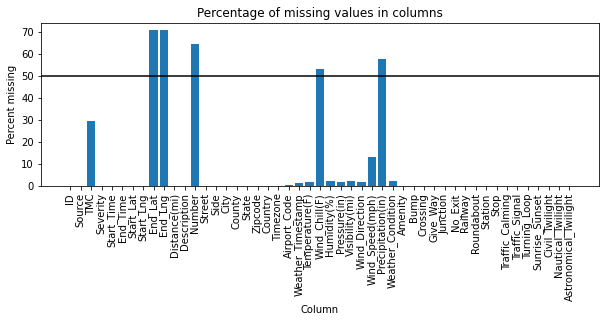

Colunms removed: ['End_Lat' 'End_Lng' 'Number' 'Wind_Chill(F)' 'Precipitation(in)']


In [10]:
# percentage of missing values by columns
pct_missing_col = df.isnull().sum()/df.shape[0]*100

fig, ax = plt.subplots(figsize=(10,3))
ax.bar(pct_missing_col.index, pct_missing_col)
ax.axhline(y=50, c='k')
ax.set_ylabel('Percent missing')
ax.set_xlabel('Column')
ax.set_title('Percentage of missing values in columns')
plt.xticks(rotation=90)
plt.show()

# drop columns that have >=50% missing values
cols_to_drop = df.columns[pct_missing_col>=30]
print(f'Colunms removed: {cols_to_drop.values}')
df2 = df.drop(cols_to_drop, axis=1, inplace=False)

##### 2. Identify columns with inconsistent values; drop columns that are not useful
* ID: Since all rows are unique, this will not be useful for EDA and will be dropped.
* TMC: Traffic Message Channel code which provides more detailed description of the accident. This attribute should be categorical (mathematical operations are meaningless and there are relatively few (21) unique values/levels). To use this, we will need to decode the TMC by mapping to a dictionary of TMC codes. However, close to 30% of values are missing. Taken together, TMC codes will not be useful for EDA as is and will be dropped.
* Severity: should be categorical. (Mathematical operations are meaningless and there are relatively few (4) unique values/levels.)
* Start_Time, End_Time: could be changed to datetime
* Description: we are unlikely to take advantage of this information unless we use natural language processing. This will be dropped.
* Zipcode: some have 9 digits, some have 5 digits. We will truncate all zipcodes to 5 digits for consistency.
* Country: There is 1 unique value. Not useful for EDA and will be dropped.
* Airport_Code: Related to the closest airport-based weather station and not the accident per se. Not as useful for EDA and will be dropped.
* Weather_Timestamp: Timestamp of weather observation, not the accident per se. We will assume the weather features were recorded at the same time as the accident. Not as useful for EDA and will be dropped.
* Turing_Loop: There is 1 unique value. Not useful for EDA and will be dropped.

In [11]:
# columns to drop, as discussed above
cols_to_drop = ['ID', 'TMC', 'Description', 'Country', 'Airport_Code', 'Weather_Timestamp', 'Turning_Loop']
print(f'Colunms removed: {cols_to_drop}')
df2.drop(cols_to_drop, axis=1, inplace=True)

Colunms removed: ['ID', 'TMC', 'Description', 'Country', 'Airport_Code', 'Weather_Timestamp', 'Turning_Loop']


In [12]:
# change Severity to categorical/object dtype
df2['Severity'] = df2['Severity'].astype(str)

# change times to datetime
df2['Start_Time'] = pd.to_datetime(df2['Start_Time'])
df2['End_Time'] = pd.to_datetime(df2['End_Time'])

# truncate zipcode to 5 digits
df2['Zipcode'] = df2['Zipcode'].str.slice(0,5)

In [13]:
# columns and dtype after cleaning the columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 37 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Source                 object        
 1   Severity               object        
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   Distance(mi)           float64       
 7   Street                 object        
 8   Side                   object        
 9   City                   object        
 10  County                 object        
 11  State                  object        
 12  Zipcode                object        
 13  Timezone               object        
 14  Temperature(F)         float64       
 15  Humidity(%)            float64       
 16  Pressure(in)           float64       
 17  Visibility(mi)         float64       
 18  Wind_Direction        

##### 3. Drop rows with missing values
We could try to account for missing values with median imputation (or mode imputation for categorical/boolean columns), but in this first iteration of EDA we will drop all rows with any missing values.

In [14]:
# find rows with missing values
print(f'Original number of rows: {df2.shape[0]}')
rows_missing_val = df2.isnull().any(axis=1)
print(f'Number of rows with missing values: {rows_missing_val.sum()} or {rows_missing_val.sum()/df2.shape[0]*100:.2f}%')

# drop rows that have missing values
df2.dropna(axis=0, how='any', inplace=True)
print(f'Number of rows after dropping rows with missing values: {df2.shape[0]}')

Original number of rows: 3513617
Number of rows with missing values: 485752 or 13.82%
Number of rows after dropping rows with missing values: 3027865


We still have >3 millions observations and will choose to proceed with next steps.

##### 4. Drop duplicate rows
We will drop all duplicate rows (keeping the first occurrence).

In [15]:
# find duplicated rows
print(f'Original number of rows: {df2.shape[0]}')
print(f'Number of duplicate rows (all duplicates): {df2.duplicated(keep=False).sum()} or {df2.duplicated(keep=False).sum()/df2.shape[0]*100:.2f}%')
print(f'Number of duplicate rows (not counting first occurrence): {df2.duplicated().sum()} or {df2.duplicated().sum()/df2.shape[0]*100:.2f}%')

# drop duplicate rows
df2.drop_duplicates(inplace=True)
print(f'Number of rows after dropping duplicate rows (keeping first occurrence): {df2.shape[0]}')
# check again
print(f'\nCheck again the number of duplicate rows (all duplicates): {df2.duplicated(keep=False).sum()} or {df2.duplicated(keep=False).sum()/df2.shape[0]*100:.2f}%')

Original number of rows: 3027865
Number of duplicate rows (all duplicates): 46362 or 1.53%
Number of duplicate rows (not counting first occurrence): 23977 or 0.79%
Number of rows after dropping duplicate rows (keeping first occurrence): 3003888

Check again the number of duplicate rows (all duplicates): 0 or 0.00%


##### 5. Check for outliers

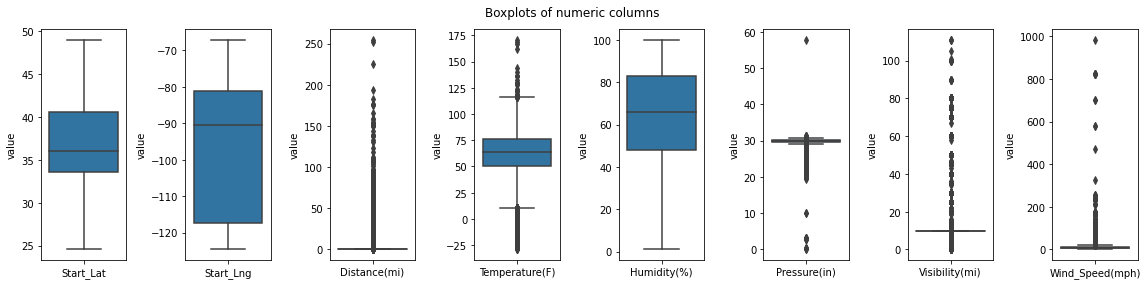

In [16]:
# visualize outliers with boxplots
# plot the numeric columns
num_cols = df2.columns[df2.dtypes=='float64'].tolist()
fig, axs = plt.subplots(1, len(num_cols), figsize=(16,4))
for ii, xx in enumerate(num_cols):
    sns.boxplot(x='variable', y='value', data=pd.melt(df2[[xx]]), ax=axs[ii])
    axs[ii].set(xlabel='')
plt.suptitle('Boxplots of numeric columns')
fig.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [17]:
# another way to check for outliers
df2.describe()

Start_Lat   Start_Lng  Distance(mi)  Temperature(F)  Humidity(%)  \
count 3003888.000 3003888.000   3003888.000     3003888.000  3003888.000   
mean       36.555     -95.631         0.279          62.428       64.175   
std         4.948      17.194         1.534          18.703       22.623   
min        24.555    -124.624         0.000         -29.000        1.000   
25%        33.563    -117.303         0.000          50.000       48.000   
50%        36.030     -90.517         0.000          64.000       66.000   
75%        40.547     -81.072         0.010          76.500       83.000   
max        49.002     -67.113       254.400         170.600      100.000   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  
count   3003888.000     3003888.000      3003888.000  
mean         29.708           9.159            8.213  
std           0.858           2.814            5.243  
min           0.000           0.000            0.000  
25%          29.680          10.000            5.000  
50%          29.930          10.000            7.000  
75%          30.080          10.000           11.500  
max          57.740         111.000          984.000

Obervations:
* Distance: The majority of the values are 0. This makes sense since most accidents are expected to be localized in nature. However, there are quite a few extreme outliers beyond the 75% percentile, including the max of 254 miles. Given the large continious range of values between 0 and 254 miles, (instead of a single outlier beyond 100 miles), this may be valid.
* Temperature(F): There are some extreme readings up to 170 F that would need to be checked against the geographical location.
* Pressure: There are few values that are double the mean, and a few values close to 0. These values appear valid.
* Visibility: Similar to Distance, there is a large continous range of values beyond the 75% percentile, which suggest that it may be valid.
* Wind_Speed: Similar to Distance and Visibility, there are some extreme outliers beyond the 75% percentile, which suggest that most values are valid. However, the larger values (e.g. >400 mph) may require checking as they are greater than 50X the mean value.

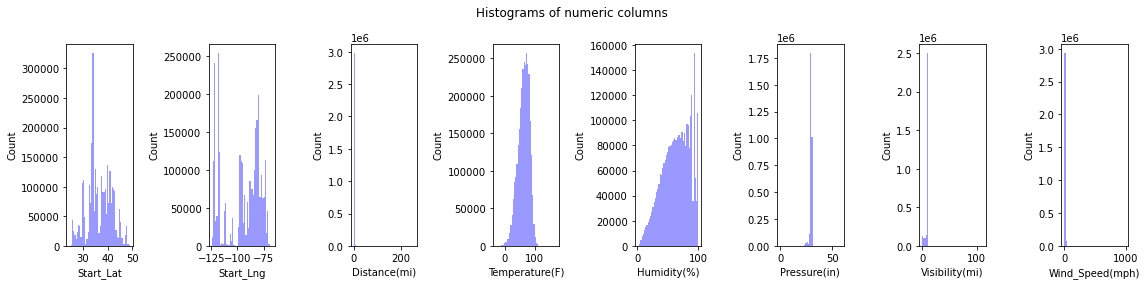

In [18]:
# visualize distributions of numeric columns
fig, axs = plt.subplots(1, len(num_cols), figsize=(16,4))
for ii, xx in enumerate(num_cols):
    sns.distplot(df2[xx], kde=False, color='b', ax=axs[ii])
    axs[ii].set_ylabel('Count')
plt.suptitle('Histograms of numeric columns')
fig.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

The histrograms support our above observations using `describe()` and boxplots.<br>
We check some values below.

In [19]:
# Check some extreme temperatures.
df2[df2['Temperature(F)']>150][['Start_Time', 'City', 'State', 'Temperature(F)']]

Start_Time          City State  Temperature(F)
292021  2016-10-19 12:06:30  Pflugerville    TX         161.600
504594  2017-07-21 11:13:24     Waterbury    CT         167.000
3170525 2019-03-26 20:00:27      Chandler    AZ         170.600
3290162 2018-08-27 08:38:39       Chicago    IL         168.800

While it seems unlikely that Chicago, IL recorded a temperature of 169F, the reading may be from a sensor in a hot vehicle.

In [20]:
# Check some extreme wind speeds.
df2[df2['Wind_Speed(mph)']>600][['Start_Time', 'City', 'State', 'Wind_Speed(mph)']]

Start_Time              City State  Wind_Speed(mph)
114585  2016-06-13 18:28:43            Sylmar    CA          822.800
114593  2016-06-13 18:44:57            Sylmar    CA          822.800
114638  2016-06-13 20:06:45           Pacoima    CA          822.800
114645  2016-06-13 20:19:08     Mission Hills    CA          822.800
114652  2016-06-13 20:30:47     Mission Hills    CA          822.800
1714869 2018-08-15 12:56:31        Sacramento    CA          703.100
1714870 2018-08-15 13:03:11        Sacramento    CA          703.100
2490600 2016-06-13 15:58:19           Pacoima    CA          822.800
2490610 2016-06-13 17:11:24           Pacoima    CA          822.800
2880149 2020-03-28 14:49:27  Port Saint Lucie    FL          984.000

Sylmar, Mission Hills, and Pacoima are in close proximity in Los Angeles County, CA. Their readings are likely from the same weather station. They are also recorded on the same day. This explains why they all have the same value of 822.8. These values may be valid, given that Sacramento is far away and recorded a 703.1 on a different date. 

##### 6. Check categorical variables

In [21]:
df2.describe(include=['O'])

Source Severity   Street     Side     City       County    State  \
count    3003888  3003888  3003888  3003888  3003888      3003888  3003888   
unique         3        4   163238        3    11473         1702       49   
top     MapQuest        2    I-5 N        R  Houston  Los Angeles       CA   
freq     2053591  2043392    34564  2462536    87842       208090   672274   

        Zipcode    Timezone Wind_Direction Weather_Condition Sunrise_Sunset  \
count   3003888     3003888        3003888           3003888        3003888   
unique    20673           4             23               124              2   
top       28208  US/Eastern           CALM             Clear            Day   
freq       5866     1262957         213040            612441        2266991   

       Civil_Twilight Nautical_Twilight Astronomical_Twilight  
count         3003888           3003888               3003888  
unique              2                 2                     2  
top               Day               Day                   Day  
freq          2409562           2552580               2658757

Observations:
* There are many unique street names that by themselves may not be useful. Combining them with City names may increase their utility. Additionally, information on some interstates and major routes may be informative. As shown below, the top 10 "Streets" where accidents occurred were interstates. We will keep this column.
* For "Side", there is one blank value (' '). We will drop that row.

In [22]:
# "Streets" with the highest frequency
df2['Street'].value_counts()[:10]

I-5 N      34564
I-95 N     30365
I-95 S     25579
I-10 E     21537
I-5 S      21398
I-10 W     20682
I-80 W     17703
I-405 N    16874
I-80 E     16181
I-75 N     14333
Name: Street, dtype: int64

In [23]:
# There is one blank value for "Side"
df2['Side'].value_counts()

R    2462536
L     541351
           1
Name: Side, dtype: int64

In [24]:
# drop the blank value for "Side"
print(f'Original number of rows: {df2.shape[0]}')
df2 = df2[df2['Side']!=' ']
print(f'Number of rows after dropping 1 row with blank values in "Side": {df2.shape[0]}')

Original number of rows: 3003888
Number of rows after dropping 1 row with blank values in "Side": 3003887


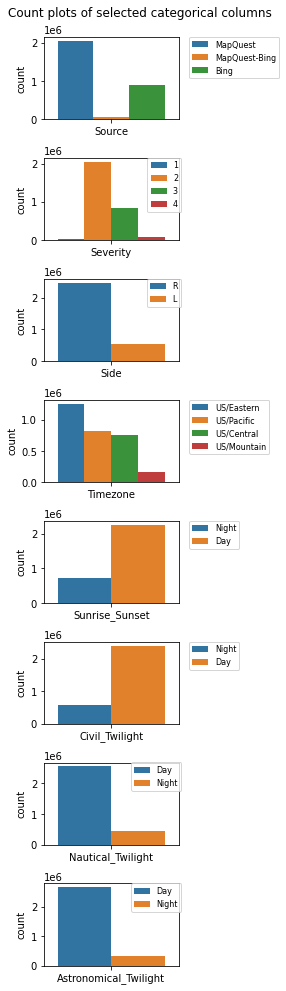

In [25]:
# examine categorical columns with count plot
# only plot columns with a few unique values
cat_cols_to_plot = ['Source', 'Severity', 'Side', 'Timezone', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
fig, axs = plt.subplots(len(cat_cols_to_plot), 1, figsize=(4,14))
for ii, xx in enumerate(cat_cols_to_plot):
    sns.countplot(x='variable', hue='value', data=pd.melt(df2[[xx]]), ax=axs[ii])
    axs[ii].set(xlabel='')
    axs[ii].legend(bbox_to_anchor=(1.05, 1.05), fontsize=8)
plt.suptitle('Count plots of selected categorical columns')
fig.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

##### 7. Pairwise correlations between variables

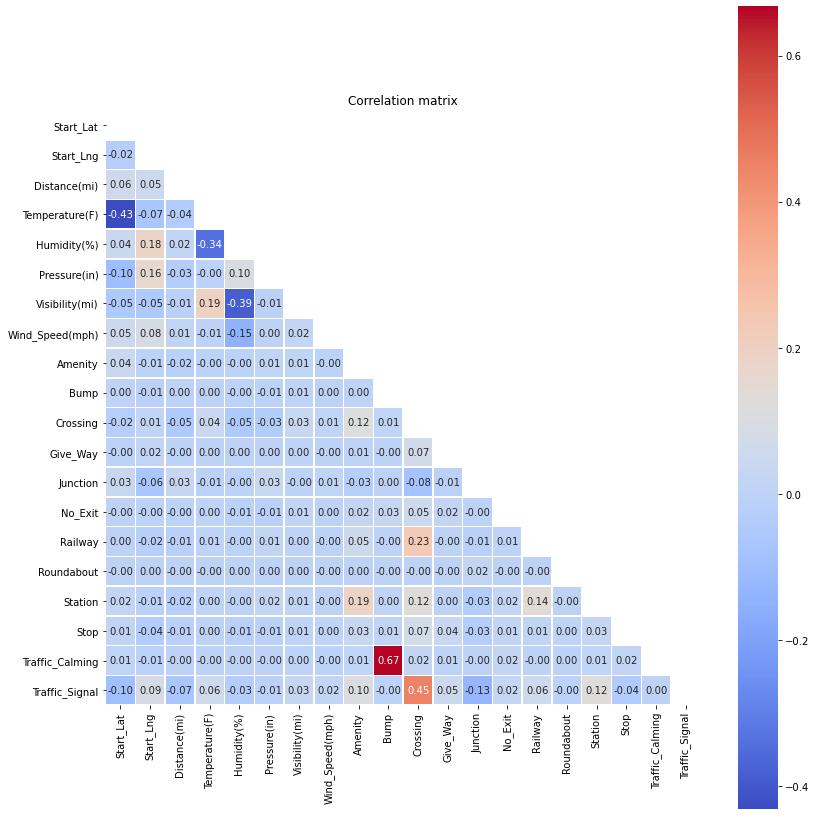

In [26]:
# examine correlation between columns
corrmat = df2.corr()
# use a mask to plot only part of a matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, mask=mask, square=True, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=ax)
ax.set_title('Correlation matrix')
plt.tight_layout()
plt.show()

Observations:
* The correlation heatmap confirms what we might expect: speed bumps are a form of traffic calming device, traffic signals would be present at crossings, and temperature is generally higher in the south, where latitude is lower.
* For the most part, however, there are no strong positive or negative pairwise correlations.

##### Save data

In [27]:
# df2.to_csv('US_Accidents_June20_final.csv', index=False)

### Phase 2

In [28]:
import plotly.express as px
from scipy.stats import mannwhitneyu

# clean up the dataframe index
df2.reset_index(drop=True, inplace=True)

### 1. Overview of the number of accidents by state and by year
We first examine the number of recorded accidents per year. 

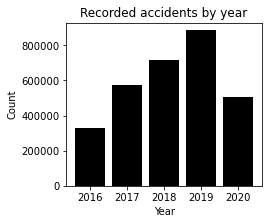

In [29]:
# get year from timestamp (Start_Time)
df2['Year'] = df2['Start_Time'].dt.year

# plot accidents by year
fig, ax = plt.subplots(figsize=(3.5, 3))
ax.bar(x=df2.groupby('Year')['Source'].count().index, height=df2.groupby('Year')['Source'].count(), color='k')
ax.set(xlabel='Year', ylabel='Count', title='Recorded accidents by year')
plt.show()

#### Observations:
* There is a year-to-year increase in the number of accidents. (Note that 2020 data is only from January-June; the number of observations for the entire year could be double what is shown here. Furthermore, 2016 data started in February.) 
* It is unclear whether this is due to more actual accidents or more recorded accidents (more accurate/complete records by sources such as MapQuest and Bing). We will not differentiate between the two and assume that all accidents were recorded in this dataset.

We next examine the spatiotemporal distribution of recorded accidents and visualize the data using a choropleth map.<br>Note: Years can be selected using the slider below the plot.

In [30]:
# plot number of accidents by state by year
df2_overview = pd.DataFrame(df2.groupby(['State', 'Year'])['Source'].count())
df2_overview = df2_overview.reset_index().rename(columns={'Source':'Count'})
fig = px.choropleth(df2_overview, locations='State', color='Count', animation_frame='Year', color_continuous_scale='Blues',
                    locationmode='USA-states', scope='usa',
                    title='# accidents by state by year')
fig.update_layout(height=450, margin={"r":0,"t":25,"l":0,"b":25})
fig.show()

#### Observations:
* California has the highest number of accidents in all years (years can be selected using the slider below the plot), followed by Texas and Florida. We suspect that this may be due to the large populations in these states.

We normalize accident counts by the population in each state. The US Accidents dataset was collected from 2016-2020. The population data we use (retreived from Wikipedia; see below) was an estimate as of July 1, 2019. We assume that it is representative of the years 2016-2020 and does not change year-to-year.

In [31]:
# get more data: population data by state
# get BeautifulSoup object from website
url = 'https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population' 
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
# find table in BeautifulSoup object and get the table as a dataframe
table = soup.find("table") 
table = pd.read_html(str(table))[0]
# get relevant columns and prepare table for use
table = table[[('State', 'State'), ('Census population', 'Estimate, July 1, 2019[8]')]]
table.columns = table.columns.droplevel()
states_dict = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut","DC":"District of Columbia", "DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"}
states_dict = dict(map(reversed, states_dict.items()))
table['State'] = table['State'].map(states_dict)
# keep only relevant states
table = table.rename(columns={'Estimate, July 1, 2019[8]':'Population'}).dropna(axis=0)
# make a dict to look up populations 
population_dict = pd.Series(table['Population'].values, index=table['State']).to_dict()
# display some entries from the look-up dict
print('Sample population by state:')
{k: population_dict[k] for k in list(population_dict)[:10]}

Sample population by state:


{'CA': '39512223',
 'TX': '28995881',
 'FL': '21477737',
 'NY': '19453561',
 'PA': '12801989',
 'IL': '12671821',
 'OH': '11689100',
 'GA': '10617423',
 'NC': '10488084',
 'MI': '9986857'}

In [32]:
# get normalized accident count per 100k population
df2_overview['Population'] = df2_overview['State'].map(population_dict).astype(int)
df2_overview['Normalized_count'] = df2_overview['Count']/(df2_overview['Population']/100e3)

# plot number of accidents by state by year
fig = px.choropleth(df2_overview, locations='State', color='Normalized_count', animation_frame='Year', color_continuous_scale='Blues',
                    locationmode='USA-states', scope='usa',
                    title='# accidents by state by year, per 100K residents')
fig.update_layout(height=450, margin={"r":0,"t":25,"l":0,"b":25})
fig.show()

Supplementing the above plot, we examine the top states by normalized count by year.

In [33]:
# get top 5 states by normalized count by year
for yy in sorted(df2['Year'].unique()):
    print('-'*50)
    print(df2_overview[df2_overview['Year']==yy].sort_values(by='Normalized_count', ascending=False)[:5].reset_index(drop=True))

--------------------------------------------------
  State  Year   Count  Population  Normalized_count
0    CA  2016  106761    39512223           270.197
1    NE  2016    5094     1934408           263.336
2    MI  2016   15059     9986857           150.788
3    FL  2016   31286    21477737           145.667
4    TX  2016   41520    28995881           143.193
--------------------------------------------------
  State  Year   Count  Population  Normalized_count
0    SC  2017   20462     5148714           397.420
1    NE  2017    5513     1934408           284.997
2    CA  2017  110126    39512223           278.714
3    MI  2017   25149     9986857           251.821
4    TX  2017   72967    28995881           251.646
--------------------------------------------------
  State  Year  Count  Population  Normalized_count
0    SC  2018  42493     5148714           825.313
1    OK  2018  18684     3956971           472.179
2    NC  2018  44375    10488084           423.099
3    OR  2018  1706

#### Observations:
* Interestingly, South Carolina has the highest number of accidents per 100K residents between 2017 and 2020.
* Other states that consistently have high normalized count between 2016-2020 include Oregon and California.
* Cities with the highest number of accidents in SC, OR, and CA are shown below.

In [34]:
# cities with highest number of accidents in SC, OR, and CA
for sss in ['SC', 'OR', 'CA']:
    print('-'*50)
    print(df2[df2['State']==sss].groupby('City')['Source'].count().sort_values(ascending=False)[:3])

--------------------------------------------------
City
Greenville     16150
Columbia       15028
Spartanburg     6189
Name: Source, dtype: int64
--------------------------------------------------
City
Portland    18375
Salem        2713
Eugene       2324
Name: Source, dtype: int64
--------------------------------------------------
City
Los Angeles    56497
Sacramento     29399
San Diego      23055
Name: Source, dtype: int64


### 2. Number of accidents by hour of day and day of week
We hypothesize that accidents occur more frequently during the AM rush hour (6-9AM) and PM rush hour (3-6PM), and occur more frequently during the work week (Mon-Fri).

We first analyze the number of accidents by hour of day. We extract the hour from the Start_Time timestamp and bin the hours into 3-hour bins (thereby reducing the number of categories/levels from 24 to 8).

We also examine whether trends are different by timezones. (We interpret these results at the end of this section.)

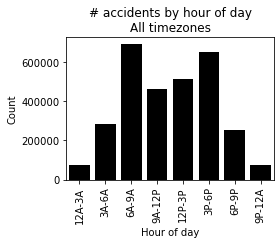

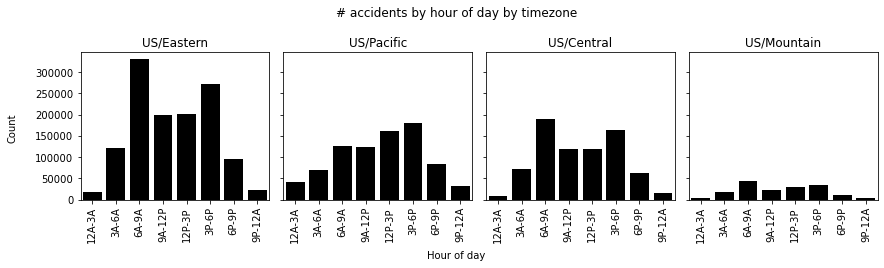

In [35]:
# get hours from timestamp and convert to bins
df2['Hour'] = df2['Start_Time'].dt.hour
df2['Hour_bin'] = pd.cut(df2['Hour'], bins=[0, 3, 6, 9, 12, 15, 18, 21, 23],
                         labels=['12A-3A', '3A-6A', '6A-9A', '9A-12P', '12P-3P', '3P-6P','6P-9P', '9P-12A'], include_lowest=True)

# plot the number of accidents by hour of day
fig, ax = plt.subplots(figsize=(4, 3.5))
sns.countplot(x='Hour_bin', data=df2, ax=ax, color='k')
ax.set(xlabel='Hour of day', ylabel='Count', title='# accidents by hour of day\nAll timezones')
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

# generate the same plot, subset by timezone
df2_timezone = df2.groupby('Timezone', sort=False)
fig, axs = plt.subplots(1, 4, figsize=(12, 3.5), sharey=True, sharex=True)
for ii, (name, group) in enumerate(df2_timezone):
    sns.countplot(x='Hour_bin', data=group, ax=axs[ii], color='k')
    axs[ii].set(xlabel='', ylabel='', title=name)
    for tick in axs[ii].get_xticklabels():
        tick.set_rotation(90)
fig.text(0.5, -0.02, 'Hour of day', ha='center')
fig.text(-0.02, 0.5, 'Count', va='center', rotation='vertical')
fig.tight_layout()
fig.suptitle('# accidents by hour of day by timezone')
plt.subplots_adjust(top=0.8)
plt.show()

We similarly analyze the number of accidents by day of week, by extracting day type from Start_Time.
<br>(We interpret these results at the end of this section.)

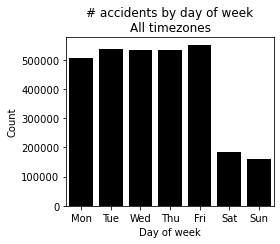

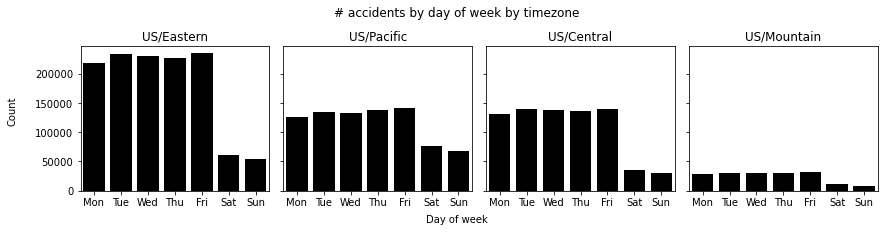

In [36]:
# get day of week from timestamp 
df2['Day_name'] = df2['Start_Time'].dt.day_name().str.slice(0,3)

# plot the number of accidents by day of week
myorder = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fig, ax = plt.subplots(figsize=(4, 3.5))
sns.countplot(x='Day_name', data=df2, ax=ax, color='k')
ax.set(xlabel='Day of week', ylabel='Count', title='# accidents by day of week\nAll timezones')
ax.ticklabel_format(style='plain', axis='y')
fig.tight_layout()
plt.show()

# generate the same plot, subset by timezone
fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharey=True, sharex=True)
for ii, (name, group) in enumerate(df2_timezone):
    sns.countplot(x='Day_name', data=group, order=myorder, ax=axs[ii], color='k')
    axs[ii].set(xlabel='', ylabel='', title=name)
fig.text(0.5, -0.02, 'Day of week', ha='center')
fig.text(-0.02, 0.5, 'Count', va='center', rotation='vertical')
fig.tight_layout()
fig.suptitle('# accidents by day of week by timezone')
plt.subplots_adjust(top=0.8)
plt.show()

Finally, we visualize the number of accidents by hour of day and day of week together in a heatmap.

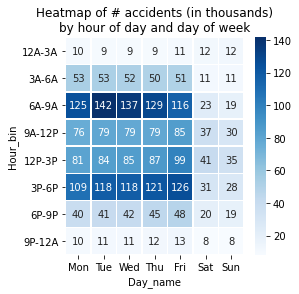

In [37]:
# get crosstab of hour of day vs. day of week and plot heatmap
fig, ax = plt.subplots(figsize=(4,4))
temp = pd.crosstab(df2['Hour_bin'], df2['Day_name'])
temp = temp[myorder]/1e3
sns.heatmap(temp, annot=True, fmt='.0f', linewidth=0.5, cmap='Blues', ax=ax)
ax.set_title('Heatmap of # accidents (in thousands)\nby hour of day and day of week')
plt.show()

#### Observations:
* Visual inspection of the data (through barplots and heatmap) supports our hypothesis that accidents occur more frequently during the AM rush hour (6-9AM) and PM rush hour (3-6PM), and occur more frequently during the work week (Mon-Fri), both across different and within individual timezones. 
* Interestingly, the AM rush hour is less pronounced in the Pacific timezone. Weekday/weekend distribution was consistent across timezones.

### 3. Fraction of accidents by street/road type
In Phase 1, we saw that the dataset contains many street names, and the top 10 "streets" with the most recorded accidents were interstate highways. However, there are many more surface streets than interstates and other highways. Here, we follow up and analyze the number of accidents on different road types. We assume that highways in the US are split into four different systems: Interstate, US Highways, state highways, and county highways. We assume all other streets are surface streets.

In [38]:
# create new column Street_type, binning the Street names (see assumptions above)
df2['Street_type'] = 'Surface'
df2.loc[df2['Street'].str.startswith('I-'), 'Street_type'] = 'Interstate'
df2.loc[df2['Street'].str.startswith('US-'), 'Street_type'] = 'US'
df2.loc[df2['Street'].str.startswith('State'), 'Street_type'] = 'State'
df2.loc[df2['Street'].str.startswith('County'), 'Street_type'] = 'County'

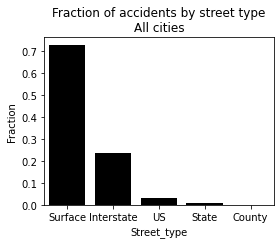

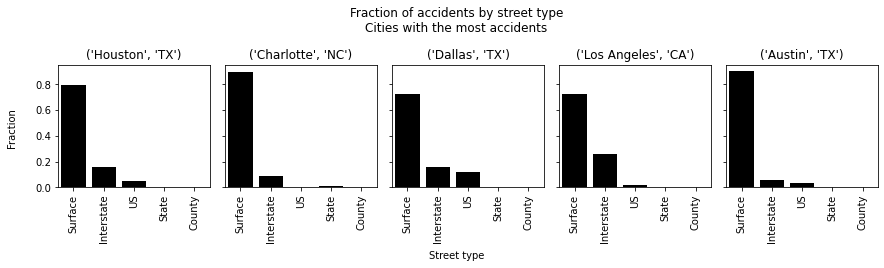

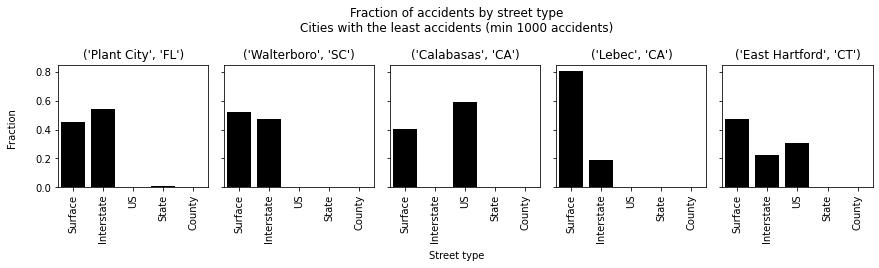

In [39]:
# plot fraction of accidents by street type for all data
myorder=['Surface', 'Interstate', 'US', 'State', 'County']
fig, ax = plt.subplots(figsize=(4, 3.5))
sns.barplot(x='index', y='Street_type', data=df2['Street_type'].value_counts(normalize=True).reset_index(), color='k', order=myorder)
ax.set(xlabel='Street_type', ylabel='Fraction', title='Fraction of accidents by street type\nAll cities')
fig.tight_layout()
plt.show()

# plot fraction of accidents by street type subset by city, state 
# show top 5 cities by number of accidents
top5_cities = df2.groupby(['City', 'State'])['Source'].count().sort_values(ascending=False)[:5].index.tolist()
fig, axs = plt.subplots(1, len(top5_cities), sharex=True, sharey=True, figsize=(12, 3.5))
for ii, city in enumerate(top5_cities):
    temp = df2.groupby(['City', 'State']).get_group(city)['Street_type'].value_counts(normalize=True).reset_index()
    sns.barplot(x='index', y='Street_type', data=temp, color='k', order=myorder, ax=axs[ii])
    axs[ii].set(xlabel='', ylabel='', title=city)
    for tick in axs[ii].get_xticklabels():
        tick.set_rotation(90)
fig.text(0.5, -0.02, 'Street type', ha='center')
fig.text(-0.02, 0.5, 'Fraction', va='center', rotation='vertical')
fig.tight_layout()
fig.suptitle('Fraction of accidents by street type\nCities with the most accidents')
plt.subplots_adjust(top=0.75)
plt.show()

# plot fraction of accidents by street type subset by city, state 
# show bottom 5 cities by number of accidents
# only consider cities with >= 1000 accidents
bot5_cities = df2.groupby(['City', 'State'])['Source'].count().sort_values(ascending=True)
bot5_cities = bot5_cities[bot5_cities>1000][:5].index.tolist()
fig, axs = plt.subplots(1, len(top5_cities), sharex=True, sharey=True, figsize=(12, 3.5))
for ii, city in enumerate(bot5_cities):
    temp = df2.groupby(['City', 'State']).get_group(city)['Street_type'].value_counts(normalize=True).reset_index()
    sns.barplot(x='index', y='Street_type', data=temp, color='k', order=myorder, ax=axs[ii])
    axs[ii].set(xlabel='', ylabel='', title=city)
    for tick in axs[ii].get_xticklabels():
        tick.set_rotation(90)
fig.text(0.5, -0.02, 'Street type', ha='center')
fig.text(-0.02, 0.5, 'Fraction', va='center', rotation='vertical')
fig.tight_layout()
fig.suptitle('Fraction of accidents by street type\nCities with the least accidents (min 1000 accidents)')
plt.subplots_adjust(top=0.75)
plt.show()  

#### Observations:
* Overall, the majority (~70%) of recorded accidents occurred on surface streets. (See assumptions described above.) Around 20% of recorded accidents occurred on interstates. Relatively few accidents were recorded on US, state, and county highways.
* The top 5 cities with the most recorded accidents are Houston, TX, Charlotte, NC, Dallas, TX, LA, CA, and Austin, TX. In these cities, the majority of accidents occurred on surface streets (~70-85%) and interstates (<20%). These 5 and other similar cities with a large number recorded accidents may dominate the overall distribution (distribution for all cities).
* We may be seeing a different trend in cities with the least recorded accidents (mininum of 1000 accidents). There, the fraction of accidents on surface streets are relatively lower (compared to all cities/nationally and cities with the most accidents), with more distribution toward interstates. Some cities, such as Calabasas, CA and East Hartford, CT instead show large(r) fraction of accidents on US highways. Thus, it may be reasonable to hypothesize that there is a different distribution of accidents by street type depending on city location and population/size.

### 4. Effect of accident severity on (1) affected road length and (2) accident resolution time
We hypothesize that more severe accidents will affect longer road lenghts and take longer time to resolve. We already have the Distance(mi) column for affected road lengths. Here, we compute the accident resolution time.

In [40]:
# get accident resolution time in minutes
df2['dt_min'] = (df2['End_Time']-df2['Start_Time']).dt.total_seconds()//60

# there are some extreme outliers
print('Descriptive stats on resolution time:')
print(df2['dt_min'].describe())

# examine some extreme outliers beyond the 99.99th percentile
print('\n\nExample outliers > the 99.99th percentile:')
df2[df2['dt_min']>np.percentile(df2['dt_min'], 99.99)].head()[['Severity', 'Start_Time', 'End_Time', 'Street_type', 'dt_min']]

Descriptive stats on resolution time:
count   3003887.000
mean        108.414
std        2757.642
min         -35.000
25%          29.000
50%          44.000
75%          75.000
max     1157083.000
Name: dt_min, dtype: float64


Example outliers > the 99.99th percentile:


Severity          Start_Time            End_Time Street_type     dt_min
313212        2 2016-11-08 01:00:00 2017-06-30 01:00:00          US 336960.000
352503        3 2017-05-03 11:17:26 2017-06-30 03:00:00  Interstate  83022.000
698027        3 2019-08-21 04:32:56 2019-10-07 06:00:00     Surface  67767.000
698028        3 2019-08-21 04:32:56 2019-10-07 07:01:00     Surface  67828.000
698029        3 2019-07-14 13:19:10 2019-10-07 06:00:00     Surface 121960.000

#### Observations:
* While the mean and median resolution time was 108 min and 44 min, some accidents affected traffic for months (for example, 336960/60/24 = 234 days).
* Furthermore, some records had End_Time < Start_Time (see below). We will assume that these are errors and should be 0 (i.e. instantly resolved).

In [41]:
# get Start_Time > End_Time (see observation above)
print('Example anomalies where Start_Time is after End_Time:')
df2[df2['Start_Time']>df2['End_Time']].head()[['Severity', 'Start_Time', 'End_Time', 'Street_type', 'dt_min']]

Example anomalies where Start_Time is after End_Time:


Severity          Start_Time            End_Time Street_type  dt_min
53352         3 2016-11-06 01:38:13 2016-11-06 01:37:57     Surface  -1.000
53353         3 2016-11-06 01:35:47 2016-11-06 01:35:31     Surface  -1.000
245854        2 2016-11-06 01:51:04 2016-11-06 01:20:49     Surface -31.000
245855        2 2016-11-06 01:51:49 2016-11-06 01:21:35     Surface -31.000
754880        2 2019-11-03 01:25:16 2019-11-03 01:12:56  Interstate -13.000

Descriptive stats on updated resolution time:
count   3003887.000
mean        108.414
std        2757.642
min           0.000
25%          29.000
50%          44.000
75%          75.000
max     1157083.000
Name: dt_min, dtype: float64


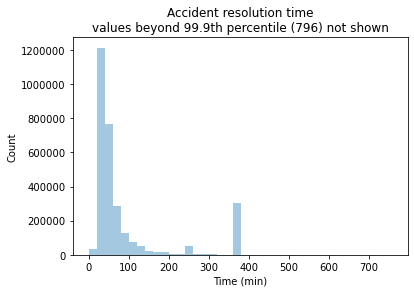

In [42]:
# Set these anomalies to 0
df2.loc[df2['Start_Time']>df2['End_Time'], 'dt_min'] = 0
print('Descriptive stats on updated resolution time:')
print(df2['dt_min'].describe())

# plot distribution of accident resolution time
# due to extreme outliers, limit at 99.9th percentile for better visualization
fig, ax = plt.subplots()
sns.distplot(df2['dt_min'], kde=False, bins=np.arange(0, np.percentile(df2['dt_min'], 99.9)+20, 20), ax=ax)
ax.set_xlim(right=np.percentile(df2['dt_min'], 99.9))
ax.set(xlabel='Time (min)', ylabel='Count', title='Accident resolution time\nvalues beyond 99.9th percentile ({:.0f}) not shown'.format(np.percentile(df2['dt_min'], 99.9)))
ax.ticklabel_format(style='plain', axis='y')
plt.show()

As shown above, we have computed and cleaned up the accident resolution time. (Minimum resolution time is now 0 not negative.)

From Phase 1, we saw that there are relatively few observations with Severity==1 or Severity==4. For example, there are ~75X accidents with Severity==2 than Severity==1, and ~9X accidents with Severity==4 than Severity==3. For this analysis we bin the 4 Severity groups into 2 groups: Minor (Severity levels 1 and 2) and Severe (Severity levels 3 and 4) and verify the results below.

In [43]:
# get and verify severity bins
df2['Severity_bin'] = pd.cut(df2['Severity'].astype(int), bins=[0, 2, 4], labels=['Minor', 'Severe'])
print('Count by Severity_bin and Severity:\n')
df2.groupby('Severity_bin')['Severity'].value_counts()

Count by Severity_bin and Severity:



Severity_bin  Severity
Minor         2           2043391
              1             26539
Severe        3            842051
              4             91906
Name: Severity, dtype: int64

We examine the effect of the severity on affected road length. In Phase 1, we saw that most (70%) of the Distance(mi) column is zero. Here, we will exclude those values and focus on observations with Distance(mi)>0.01.

In [44]:
# 70% of Distance(mi) values are zeros
print('Most frequent values of Distance(mi):')
print(df2['Distance(mi)'].value_counts(normalize=True).head())

# get observations with Distance(mi)>0.01
dist_temp = df2[df2['Distance(mi)']>0.01][['Severity_bin', 'Distance(mi)']]
# get descriptive stats on the Minor and Severe samples
dist_temp.groupby('Severity_bin')['Distance(mi)'].describe()

Most frequent values of Distance(mi):
0.000   0.706
0.010   0.067
0.010   0.004
0.020   0.002
0.001   0.002
Name: Distance(mi), dtype: float64


count  mean   std   min   25%   50%   75%     max
Severity_bin                                                       
Minor        388224.000 0.845 2.092 0.011 0.192 0.437 0.790 224.590
Severe       261788.000 1.938 4.072 0.011 0.340 0.740 1.810 254.400

From the boxplots below, both Minor and Severe samples show positive-skew distributions with long right tails. To visualize how the means compare, we additionally generate barplots with the mean and 95% confidence intervals around the mean.

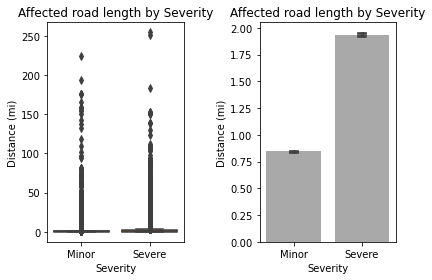

In [45]:
# plot Distance(mi) by Severity
fig, axs = plt.subplots(1, 2, figsize=(6, 4))
sns.boxplot(x='Severity_bin', y='Distance(mi)', data=dist_temp, ax=axs[0])
sns.barplot(x='Severity_bin', y='Distance(mi)', data=dist_temp, color='darkgrey', ci=95, capsize=0.1, ax=axs[1])
for ax in axs:
    ax.set(xlabel='Severity', ylabel='Distance (mi)', title='Affected road length by Severity')
fig.tight_layout()
plt.show()

Since we are unsure of the sample distributions (due to the long right tails, as discussed above), as a first pass we use the nonparametric Mann-Whitney U test to compare mean ranks.

In [46]:
# Mann-Whitney U test 
statistic, pvalue = mannwhitneyu(dist_temp.groupby('Severity_bin').get_group('Minor')['Distance(mi)'].values,
                                 dist_temp.groupby('Severity_bin').get_group('Severe')['Distance(mi)'].values)
print(f'Mann-Whitney U test statistic={statistic}, p-value={pvalue:.3f}')

Mann-Whitney U test statistic=35811013596.5, p-value=0.000


For the Mann Whitney U test, the null hypothesis is that the probability is 50% that a randomly drawn member of the first population will exceed a member of the second population. 
<br>Source: https://www.statisticshowto.com/mann-whitney-u-test/

Given our results we can reject the null hypothesis, suggesting that the Minor and Severe sample distributions are not equal. However, with large sample sizes trivially small effects can be found to be statistically significant. For this EDA, we simply note that the mean and median affected road length are larger for Severe than Minor, and the differences appear to be meaningful. We leave a more formal statistical comparison as potential future work.

We similarly examine the effect of severity on accident resolution time, following steps and rationale described above for affected road lengths.

In [47]:
# get descriptive stats on the Minor and Severe samples
df2.groupby('Severity_bin')['dt_min'].describe()

count    mean      std   min    25%    50%    75%  \
Severity_bin                                                           
Minor        2069930.000  98.862 1536.818 0.000 29.000 44.000 79.000   
Severe        933957.000 129.584 4384.465 0.000 29.000 44.000 61.000   

                     max  
Severity_bin              
Minor        1157083.000  
Severe       1039752.000

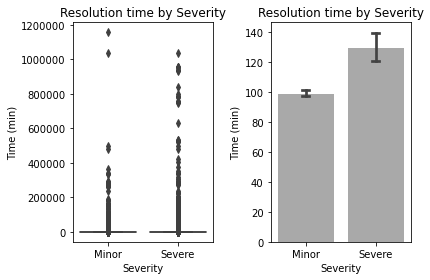

Mann-Whitney U test statistic=835333702735.5, p-value=0.000


In [48]:
# plot dt_min by Severity
fig, axs = plt.subplots(1, 2, figsize=(6, 4))
sns.boxplot(x='Severity_bin', y='dt_min', data=df2, ax=axs[0])
sns.barplot(x='Severity_bin', y='dt_min', data=df2, color='darkgrey', ci=95, capsize=0.1, ax=axs[1])
for ax in axs:
    ax.set(xlabel='Severity', ylabel='Time (min)', title='Resolution time by Severity')
    ax.ticklabel_format(style='plain', axis='y')
fig.tight_layout()
plt.show()

# Mann-Whitney U test 
statistic, pvalue = mannwhitneyu(df2.groupby('Severity_bin').get_group('Minor')['dt_min'].values,
                                 df2.groupby('Severity_bin').get_group('Severe')['dt_min'].values)
print(f'Mann-Whitney U test statistic={statistic}, p-value={pvalue:.3f}')

We can reject the null hypothesis that it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution, suggesting that the Minor and Severe distributions are not equal.

We also note that the mean resolution time is larger for Severe than Minor, and the difference appears to be meaningful. (However, the median resolution time, as shown above using `describe()`, is 44 min for both samples.) As above, we will leave a more formal statistical comparison as potential future work.

#### Observations:
* Visually, the barplots showing means and 95% confidence intervals around the mean support our hypothesis that more severe accidents affect longer road lenghts and take longer time to resolve. 
* As a first pass, we used the Mann-Whitney U test to compare mean ranks, and our results suggest that Minor and Severe sample distributions are not equal. 
* However, a more formal statistical analysis, perhaps focusing on effect sizes and beyond the scope of this EDA project, is required to verify these observations.

### 5. Analysis of accident records at higher spatial resolution using latitude and longitude
We previously analyzed the number of accidents by state and found that South Carolina showed a high number of accidents per 100K residents. We revisit the spatial distribution of accidents using latitude and longitude.

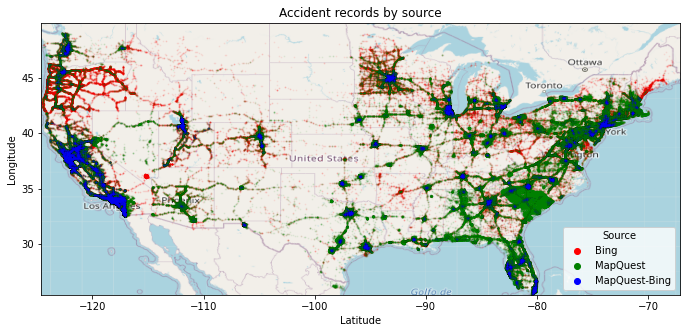

In [49]:
# plot latitude and longitude of accident records across the US
bbox = ((df2['Start_Lng'].min(), df2['Start_Lng'].max(),      
         df2['Start_Lat'].min(), df2['Start_Lat'].max()))
bbox = np.round(bbox, 3)
bbox[2]+=0.9
bbox[3]+=0.9
cs = ['r', 'g', 'b']
fig, ax = plt.subplots(figsize=((bbox[1]-bbox[0])/(bbox[3]-bbox[2])*5, 5))
for ii, (name, group) in enumerate(df2.groupby('Source')):
    ax.scatter(group['Start_Lng'], group['Start_Lat'], alpha=0.05, c=cs[ii], s=1)
    ax.scatter(0,0, c=cs[ii], label=name)
ax.imshow(plt.imread('https://raw.githubusercontent.com/lhuang123/bio/master/map.png'), extent=bbox, aspect='equal')
ax.set_xlim(bbox[0], bbox[1])
ax.set_ylim(bbox[2], bbox[3])
ax.set_title('Accident records by source')
ax.legend(title='Source', loc=4)
ax.set(xlabel='Latitude', ylabel='Longitude')
plt.show()

#### Observations:
* The density of accidents in South Carolina appears higher than many other parts of the country (i.e., markers overlay the entire state). This is consistent with our result in Part 1 that South Carolina has a high number of recorded accidents per 100K residents. However, future work should verify how the data was collected in different states. As stated in Part 1, in this EDA we assume that this dataset contains a record of all accidents.
* Of the 3 sources, MaqQuest has the most coverage across the US. MaqQuest-Bing appears to focus on large cities/metro areas. Bing is popular in Oregon.

Next, we use latitude and longitude to analyze whether the pattern of accidents change throughout the years. We use Seattle, WA as an example, focusing on a relativley small area to spot spatial trends.

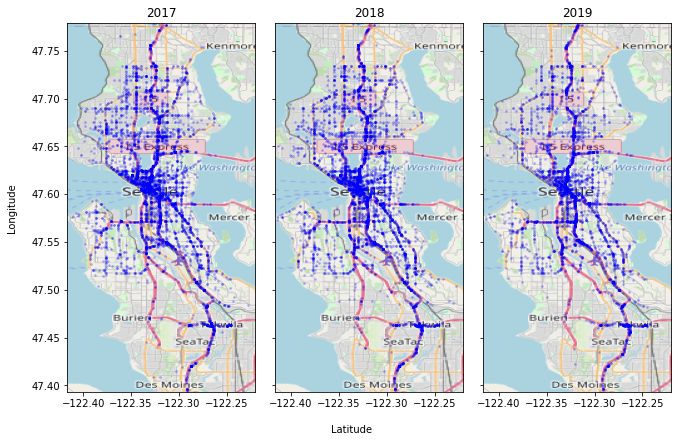

In [50]:
# plot latitude and longitude of accident records in Seattle 
# subset for Seattle
df2_seattle = df2[(df2['City']=='Seattle') & (df2['State']=='WA')]
bbox = ((df2_seattle['Start_Lng'].min(), df2_seattle['Start_Lng'].max(),      
         df2_seattle['Start_Lat'].min(), df2_seattle['Start_Lat'].max()))
bbox = np.round(bbox, 3)
bbox[2]+=0.001
bbox[3]+=0.001
# select for data in 2017-2019
df2_seattle = df2_seattle[df2_seattle['Year'].isin(['2017', '2018', '2019'])]
fig, axs = plt.subplots(1, df2_seattle['Year'].nunique(), 
                        figsize=((bbox[1]-bbox[0])/(bbox[3]-bbox[2])*6*3, 6), sharex=True, sharey=True)
for ii, (name, group) in enumerate(df2_seattle.groupby('Year')):
    axs[ii].scatter(group['Start_Lng'], group['Start_Lat'], alpha=0.2, c='b', s=3)
    axs[ii].imshow(plt.imread('https://raw.githubusercontent.com/lhuang123/bio/master/map2.png'), extent=bbox, aspect='equal')
    axs[ii].set_title(name)
fig.text(0.5, -0.02, 'Latitude', ha='center')
fig.text(-0.02, 0.5, 'Longitude', va='center', rotation='vertical')
fig.tight_layout()
plt.show()

#### Observations:
* In Seattle, the spatial distribution of accidents appear to be similar year-to-year, at least viewed at the city level. Many accidents occurred downtown near the center of the map, and on major highways and bridges (pink roadways on the map). 
* This was a proof-of-principle analysis; the data may be more useful when analyzed at even higher spatiotemporal resolution (e.g. mapping by neighborhoods/zipcodes and by hour of day).

### Overall summary and conclusions
We continued with the analysis we started in Phase 1. We found that:
1. South Carolina has the highest number of accidents per 100K residents between 2017 and 2020. Other states that consistently have high normalized count between 2016-2020 include Oregon and California.
2. Accidents occur more frequently during the AM rush hour (6-9AM) and PM rush hour (3-6PM), and occur more frequently during the work week (Mon-Fri), both across different and within individual timezones.
3. Overall, ~70% of recorded accidents occurred on surface streets and ~20% occurred on interstate highways. US, state, and county highways have relatively few recorded accidents.
4. By visual inspection, more severe accidents affect longer road lenghts and take longer time to resolve. A more formal statistical analysis, perhaps focusing on effect sizes and beyond the scope of this EDA project, is required to verify these observations.
5. The density of accidents in South Carolina appears higher than many other parts of the country. This is consistent with South Carolina having the highest number of accidents per 100K residents between 2017 and 2020. However, future work should verify how the data was collected in different states. 

#### Data source
The data used in this project is "A Countrywide Traffic Accident Dataset", available on Kaggle:
(https://www.kaggle.com/sobhanmoosavi/us-accidents).


The data is further described in these papers:
* Moosavi et al. (2019) A Countrywide Traffic Accident Dataset. (https://arxiv.org/abs/1906.05409)
* Moosavi et al. (2019) Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights. Proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM. (https://arxiv.org/abs/1909.09638)
